## Waste Management Using CNN Model

In [28]:
# pip install opencv-python

In [29]:
# pip install tensorflow

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
# Display progress bar for data loading
# tqdm ensures a visual representation of loading progress
from tqdm import tqdm
import os
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore', category=UserWarning, message=".*numpy.*")


c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
# Define paths for the training and testing datasets
train_path = os.path.join("dataset/TRAIN")
test_path = os.path.join("dataset/TEST")

In [5]:
# Import TensorFlow and Keras libraries for building the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Dense, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [6]:
from cv2 import cvtColor
# Initialize empty lists to store image data and corresponding labels
x_data = []
y_data = []
# Iterate through each category folder in the training dataset
for category in glob(train_path+'/*'):
        # Iterate through each image file in the category folder
    for file in tqdm(glob(category+'/*')):
                # Read the image file
        img_array = cv2.imread(file)
        
        # Convert the image from BGR format (OpenCV default) to RGB
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
                # Create a DataFrame to store image data and labels
        data = pd.DataFrame({'image' :x_data, 'label' :y_data})

100%|██████████| 9999/9999 [02:08<00:00, 77.62it/s] 


In [7]:
# Check the shape of the DataFrame to verify the number of images and labels
# data.shape should return (22564, 2) indicating 22,564 rows and 2 columns
data.shape

(22564, 2)

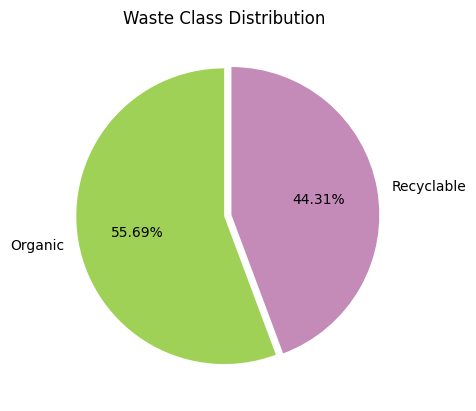

In [8]:
# Visualizing the distribution of waste classes
colors = [ '#a0d157', '#c48bb8' ]
# Visualize the distribution of classes (Organic and Recyclable) in the dataset
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors = colors, startangle=90, explode = [0, 0.05])
# Display the chart title
plt.title('Waste Class Distribution')
# Display the pie chart
plt.show()


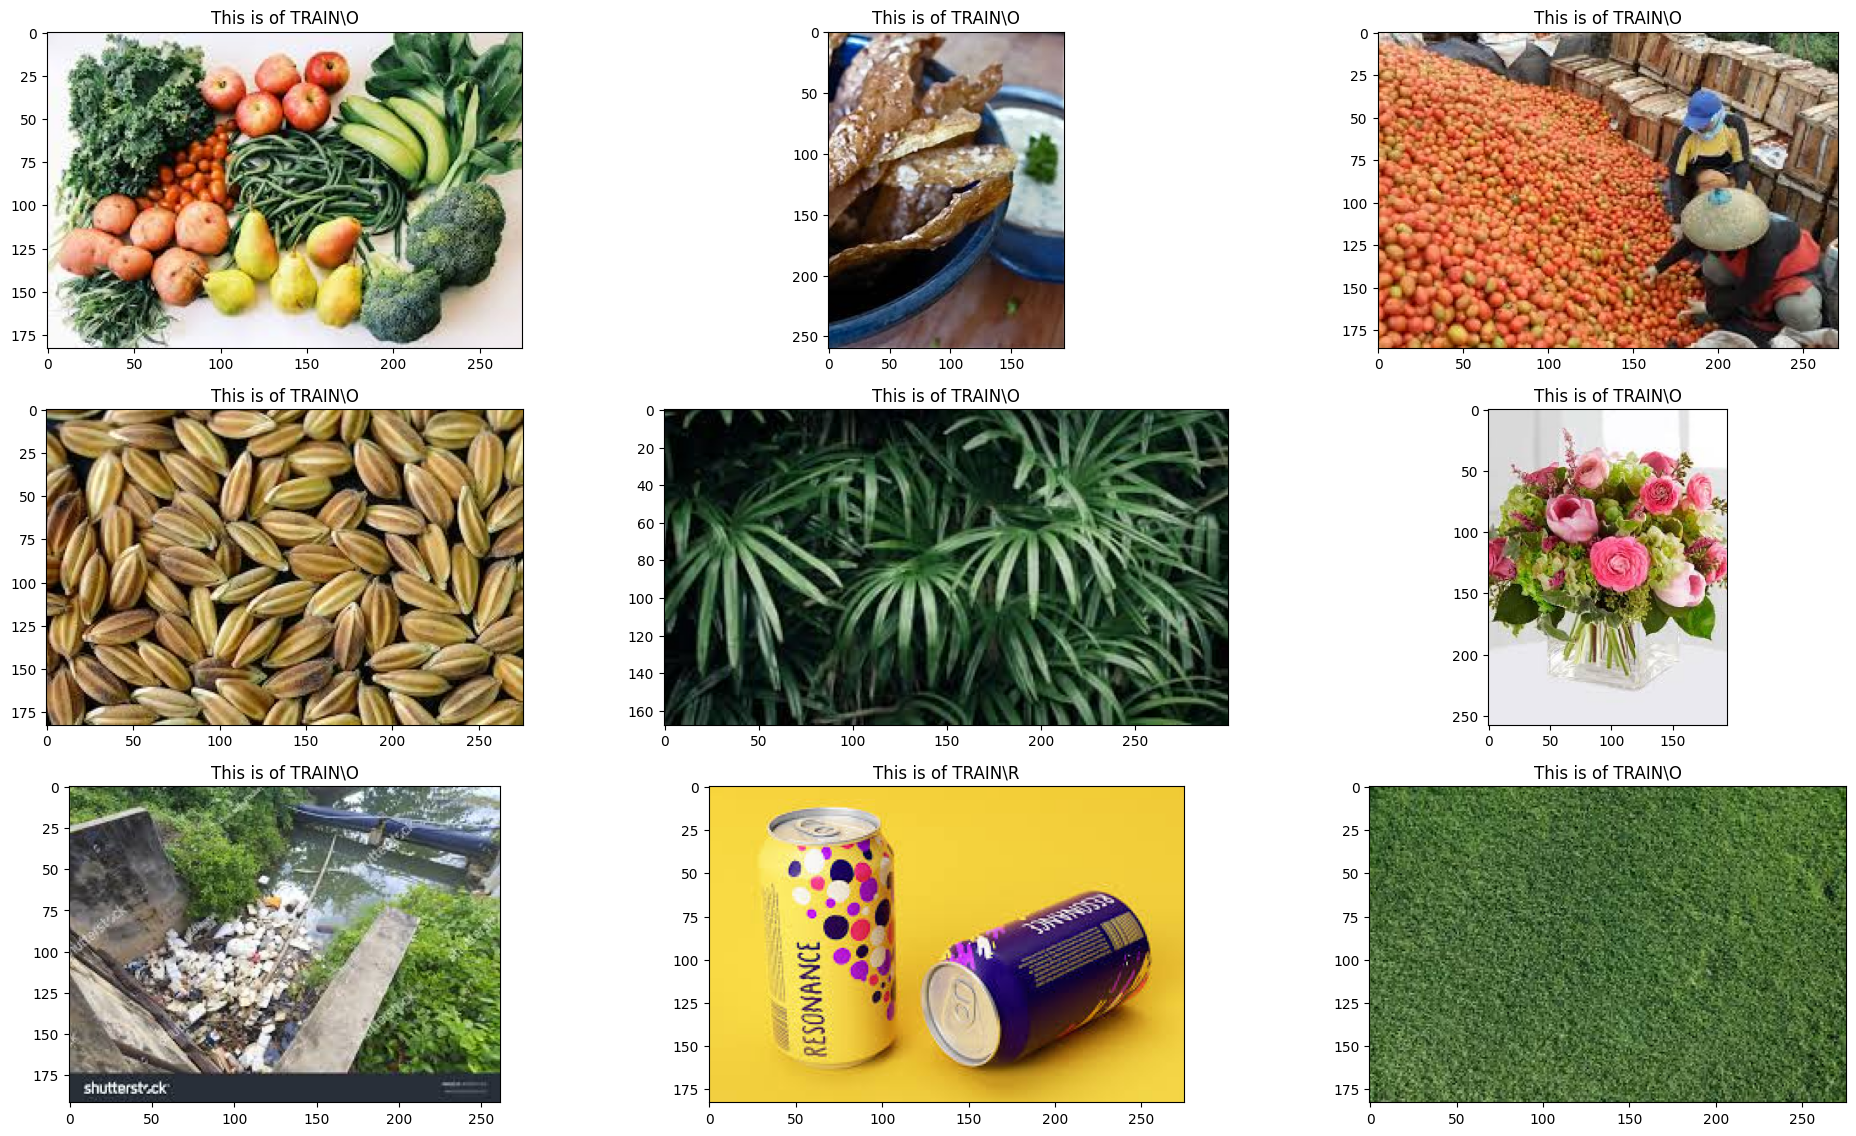

In [9]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN - Convolutional Neural Network

In [22]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(GlobalAveragePooling2D())  # Replaces Flatten()

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 32


In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_12 (Activation)  (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_13 (Activation)  (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [24]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (244, 244),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "binary")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (244, 244),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "binary")


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [27]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
706/706 [==============================] - 5602s 8s/step - loss: 0.4566 - accuracy: 0.7964 - val_loss: 0.3606 - val_accuracy: 0.8591
Epoch 2/10
706/706 [==============================] - 4561s 6s/step - loss: 0.4001 - accuracy: 0.8322 - val_loss: 0.2977 - val_accuracy: 0.8894
Epoch 3/10
706/706 [==============================] - 4556s 6s/step - loss: 0.3771 - accuracy: 0.8439 - val_loss: 0.2919 - val_accuracy: 0.8934
Epoch 4/10
706/706 [==============================] - 6002s 9s/step - loss: 0.3500 - accuracy: 0.8590 - val_loss: 0.2713 - val_accuracy: 0.9053
Epoch 5/10
706/706 [==============================] - 5669s 8s/step - loss: 0.3308 - accuracy: 0.8670 - val_loss: 0.2383 - val_accuracy: 0.9156
Epoch 6/10
706/706 [==============================] - 12940s 18s/step - loss: 0.3188 - accuracy: 0.8725 - val_loss: 0.2507 - val_accuracy: 0.9077
Epoch 7/10
706/706 [==============================] - 14332s 20s/step - loss: 0.3096 - accuracy: 0.8770 - val_loss: 0.2392 - val_accur